<a href="https://colab.research.google.com/github/SohaliBaisla/Handwritten-Digit-Classification/blob/main/SohaliBaisla_Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from PIL import Image, ImageOps
from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv("/content/drive/MyDrive/Dataset/Mnist/digit-recognizer/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(42000, 785)

In [5]:
data1 = data.values
print(type(data1))

<class 'numpy.ndarray'>


In [6]:
#Cleaning data
pixels=data1[:,1:]
labels=data1[:,0]

In [7]:
print(pixels.shape, labels.shape)

(42000, 784) (42000,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.2)

In [9]:
print("Training data shape : ",X_train.shape, y_train.shape)
print("Testing data shape : ",X_test.shape, y_test.shape)

Training data shape :  (33600, 784) (33600,)
Testing data shape :  (8400, 784) (8400,)


In [10]:
#Function to calculate distance between various points
def distance(x1,x2):
  return np.sqrt(sum((x1-x2)**2))

In [21]:
def knn(pixels, labels, queryPoint, k=10):
    value = []
    m = pixels.shape[0]
    for i in range(m):
        d = distance(queryPoint, pixels[i])
        value.append((d, labels[i]))
    value = sorted(value)
    value = value[:k]
    value = np.array(value)
    new_value = np.unique(value[:, 1], return_counts = True)
    index = new_value[1].argmax()
    predict = new_value[0][index]
    return predict

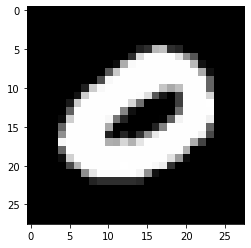

In [12]:
def drawImg(sample):
    img = sample.reshape((28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()

drawImg(X_test[120])

In [13]:
Prediction = knn(X_train, y_train, X_test[11])
print(int(Prediction))

5


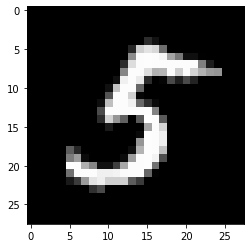

In [14]:
drawImg(X_test[11])

In [15]:
def accuracy(X_train,y_train,X_test,y_test):
  size=X_test.shape[0]
  cnt=0
  for i in range(size):
    pred=knn(X_train,y_train,X_test[i])
    if(pred==y_test[i]):
      cnt=cnt+1
  acc=cnt/size
  return acc

In [19]:
acc=accuracy(X_train,y_train,X_test,y_test)
acc

0.9633333333333334

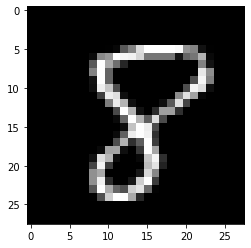

Label : 8.0




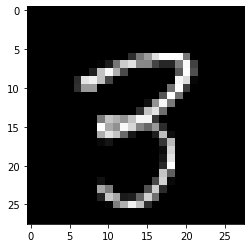

Label : 3.0




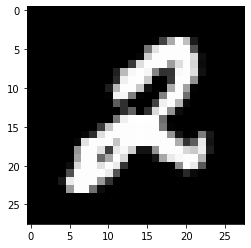

Label : 2.0




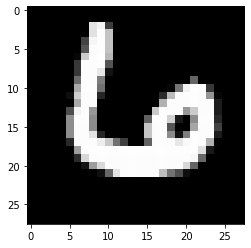

Label : 6.0




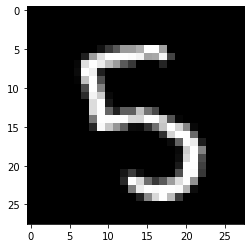

Label : 5.0




In [22]:
for i in range(5):
    result = knn(X_train, y_train, X_test[i])
    drawImg(X_test[i])
    print(f"Label : {result}\n\n")